In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#imputation
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
# train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# feature selection
from sklearn.feature_selection import RFE
# classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("D:/DS/zs/zs_data.csv",index_col = 0, na_values = missing_values)

In [4]:
#pandas_profiling.ProfileReport(df)

In [5]:
df.describe()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-null object
type_of_shot             15417 non-

In [7]:
df['shot_id_number'] = df.index + 1

In [8]:
df['shot_id_number'].isnull().any()

False

In [9]:
df.head(10)

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0
6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.0,0.000,112.2000,89.4
7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.0,0.000,5.0000,22.0
8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0000,32.0
9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.0,0.000,52.2000,NaN


In [10]:
df['knockout_match'].value_counts()

0.0    24921
1.0     4259
Name: knockout_match, dtype: int64

In [11]:
df['match_event_id'].value_counts().head()

2.0      128
4.0      102
11.0      92
278.0     88
8.0       87
Name: match_event_id, dtype: int64

In [12]:
df['power_of_shot'].value_counts()

3.0    7885
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64

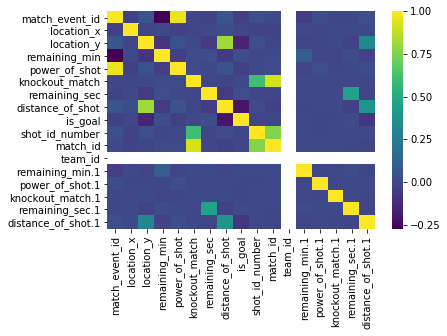

In [13]:
correlation = df.corr()
sns.heatmap(correlation, cmap = 'viridis')

In [14]:
correlation = df.corr()['is_goal']
# convert series to dataframe so it can be sorted
correlation_df = pd.DataFrame(correlation)
# correct column label from Points to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted.head(20)

,Correlation
is_goal,1.000000
remaining_sec,0.028964
remaining_min,0.028342
remaining_sec.1,0.012209
remaining_min.1,0.008384
knockout_match,0.001152
match_id,-0.000169
knockout_match.1,-0.001224
power_of_shot.1,-0.001363
location_x,-0.004728


In [15]:
df2 = df.loc[df['is_goal'].isnull() == True]

In [16]:
df['is_goal'].isnull().sum()

6268

In [17]:
df1 = df.drop(df[df['is_goal'].isnull()].index)

In [18]:
df1.shape

(24429, 27)

In [19]:
df2.shape

(6268, 27)

In [20]:
df.shape

(30697, 27)

In [21]:
df1['is_goal'].isnull().any()

False

In [22]:
df2['is_goal'].value_counts()

Series([], Name: is_goal, dtype: int64)

Hence,
* df is the main dataset
* df1 is the df with non NULL is_goal values
* df2 is the df with NULL is_goal values

In [23]:
submit = df2[['shot_id_number', 'is_goal']].copy()

In [24]:
submit.shape

(6268, 2)

Checking for NULL values in other features of df1

In [25]:
print(df1.isnull().any())

match_event_id            True
location_x                True
location_y                True
remaining_min             True
power_of_shot             True
knockout_match            True
game_season               True
remaining_sec             True
distance_of_shot          True
is_goal                  False
area_of_shot              True
shot_basics               True
range_of_shot             True
team_name                 True
date_of_game              True
home/away                 True
shot_id_number           False
lat/lng                   True
type_of_shot              True
type_of_combined_shot     True
match_id                 False
team_id                  False
remaining_min.1           True
power_of_shot.1           True
knockout_match.1          True
remaining_sec.1           True
distance_of_shot.1        True
dtype: bool


In [26]:
df1.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0


In [27]:
df1.count()

match_event_id           23189
location_x               23273
location_y               23184
remaining_min            23185
power_of_shot            23229
knockout_match           23217
game_season              19797
remaining_sec            23179
distance_of_shot         23172
is_goal                  24429
area_of_shot             23247
shot_basics              23146
range_of_shot            23181
team_name                23217
date_of_game             23192
home/away                23215
shot_id_number           24429
lat/lng                  23182
type_of_shot             12293
type_of_combined_shot    12136
match_id                 24429
team_id                  24429
remaining_min.1          23220
power_of_shot.1          23221
knockout_match.1         23215
remaining_sec.1          23229
distance_of_shot.1       23185
dtype: int64

In [28]:
df1.shape

(24429, 27)

By comparing the above two cells, we find that apart from 'match_id' , 'team_id' , 'shot_id_number' & 'is_goal', all other features have NULL values.

In [29]:
df1 = df1.drop(['match_event_id', 'location_x', 'location_y', 'game_season', 'team_name', 'date_of_game', 'lat/lng', 'match_id', 'team_id'], axis = 1)

In [30]:
df1.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2,shot - 45,NaN,10.00,1.0,28.800,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,3,shot - 25,NaN,92.64,1.0,0.000,63.7216,54.4
3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4,NaN,shot - 3,NaN,1.0,122.608,52.0000,42.0
4,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5,NaN,shot - 1,42.64,2.0,0.000,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6,shot - 17,NaN,9.00,3.0,0.000,NaN,34.0


Catgorical Variables: 
* area_of_shot
* shot_basics
* home/away
* type_of_shot
* type_of_combined_shot

Dropping knockout_match.1, remaining_min.1, power_of_shot.1 since they contain weird values

In [31]:
df1 = df1.drop(['knockout_match.1', 'power_of_shot.1', 'remaining_min.1'], axis = 1)

In [32]:
df1.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2,shot - 45,NaN,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,3,shot - 25,NaN,63.7216,54.4
3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4,NaN,shot - 3,52.0000,42.0
4,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5,NaN,shot - 1,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6,shot - 17,NaN,NaN,34.0


In [33]:
df1['remaining_min'].value_counts()

0.0     2921
4.0     2176
2.0     2169
3.0     2127
1.0     2080
5.0     1968
6.0     1776
9.0     1696
7.0     1684
10.0    1612
8.0     1580
11.0    1396
Name: remaining_min, dtype: int64

In [34]:
df1['power_of_shot'].value_counts()

3.0    6306
1.0    6064
4.0    5482
2.0    5088
5.0     255
6.0      27
7.0       7
Name: power_of_shot, dtype: int64

In [35]:
df1['knockout_match'].value_counts()

0.0    19834
1.0     3383
Name: knockout_match, dtype: int64

In [36]:
df1['remaining_sec'].value_counts().head()

0.0     759
1.0     484
2.0     458
28.0    438
4.0     434
Name: remaining_sec, dtype: int64

In [37]:
df1['remaining_sec.1'].value_counts().head()

0.0     617
1.0     407
28.0    369
4.0     355
2.0     353
Name: remaining_sec.1, dtype: int64

In [38]:
df1['distance_of_shot'].value_counts().head()

20.0    4144
45.0    1463
44.0    1149
37.0    1118
36.0    1058
Name: distance_of_shot, dtype: int64

In [39]:
df1['distance_of_shot.1'].value_counts().head()

20.0    3345
45.0    1185
44.0     927
37.0     893
38.0     858
Name: distance_of_shot.1, dtype: int64

In [40]:
df1['area_of_shot'].value_counts()

Center(C)                10177
Right Side Center(RC)     3616
Right Side(R)             3504
Left Side Center(LC)      3031
Left Side(L)              2848
Mid Ground(MG)              71
Name: area_of_shot, dtype: int64

In [41]:
df1['shot_basics'].value_counts()

Mid Range          9488
Goal Area          5323
Penalty Spot       4245
Goal Line          3515
Right Corner        302
Left Corner         216
Mid Ground Line      57
Name: shot_basics, dtype: int64

In [42]:
df1['range_of_shot'].value_counts()

Less Than 8 ft.    7064
16-24 ft.          6220
8-16 ft.           5076
24+ ft.            4751
Back Court Shot      70
Name: range_of_shot, dtype: int64

In [43]:
df1['home/away'].value_counts().head()

MANU @ SAS      767
MANU @ PHX      701
MANU vs. SAS    693
MANU @ SAC      686
MANU vs. PHX    650
Name: home/away, dtype: int64

In [44]:
df1['type_of_shot'].value_counts().head()

shot - 39    1145
shot - 36    1042
shot - 4      875
shot - 15     554
shot - 38     521
Name: type_of_shot, dtype: int64

In [45]:
df1['type_of_combined_shot'].value_counts()

shot - 3    9338
shot - 4    2129
shot - 1     470
shot - 5      72
shot - 2      66
shot - 0      61
Name: type_of_combined_shot, dtype: int64

Numeric Variables:
* remaining_min
* power_of_shot
* knockout_match
* remaining_sec
* remaining_sec.1
* distance_of_shot
* distance_of_shot.1

Categorical Variables:
* area_of_shot
* shot_basics
* range_of_shot
* home/away
* type_of_shot
* type_of_combined_shot

In [46]:
df1.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2,shot - 45,NaN,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,3,shot - 25,NaN,63.7216,54.4
3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4,NaN,shot - 3,52.0000,42.0
4,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5,NaN,shot - 1,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6,shot - 17,NaN,NaN,34.0


In [47]:
df1['home/away'] = df1['home/away'].fillna(method='ffill')

In [48]:
df1['home/away'].isnull().any()

False

In [49]:
ha = np.asarray(df1[['home/away']])

In [50]:
ha.size

24429

In [131]:
df1['home/away'] = df1['home/away'].str.contains("@", regex = True)

In [132]:
df1['home/away'].size

24429

In [134]:
df1['home/away'].head(20)

1      True
2      True
3      True
4      True
5      True
6      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
17    False
18    False
20    False
22    False
23    False
24    False
Name: home/away, dtype: bool

### IMPUTATION

In [53]:
len(df1) - df1.count()

remaining_min             1244
power_of_shot             1200
knockout_match            1212
remaining_sec             1250
distance_of_shot          1257
is_goal                      0
area_of_shot              1182
shot_basics               1283
range_of_shot             1248
home/away                    0
shot_id_number               0
type_of_shot             12136
type_of_combined_shot    12293
remaining_sec.1           1200
distance_of_shot.1        1244
dtype: int64

In [54]:
df1.shape

(24429, 15)

Imputation for remaining_min

In [55]:
df1['remaining_min'] = df1['remaining_min'].fillna(method='ffill')

In [56]:
df1['remaining_min'].isnull().any()

False

In [57]:
df1['remaining_min'].count()

24429

Imputation for power_of_shot

In [58]:
df1['power_of_shot'].value_counts()

3.0    6306
1.0    6064
4.0    5482
2.0    5088
5.0     255
6.0      27
7.0       7
Name: power_of_shot, dtype: int64

In [59]:
median = df1['power_of_shot'].median()
df1['power_of_shot'] = df1['power_of_shot'].fillna(median)

In [60]:
df1['power_of_shot'].isnull().any()

False

Imputation of knockout_match

In [61]:
df1['knockout_match'] = df1['knockout_match'].fillna(method='ffill')

In [62]:
df1['knockout_match'].isnull().any()

False

Imputation of remaining_sec & remaining_sec.1

In [63]:
m1 = df1['remaining_sec'].median()
df1['remaining_sec'] = df1['remaining_sec'].fillna(m1)
m2 = df1['remaining_sec.1'].median()
df1['remaining_sec.1'] = df1['remaining_sec.1'].fillna(m2)

In [64]:
df1['remaining_sec'].isnull().any()

False

In [65]:
df1['remaining_sec.1'].isnull().any()

False

Imputation of distance_of_shot & distance_of_shot.1

In [66]:
m1 = df1['distance_of_shot'].median()
df1['distance_of_shot'] = df1['distance_of_shot'].fillna(m1)
m2 = df1['distance_of_shot.1'].median()
df1['distance_of_shot.1'] = df1['distance_of_shot'].fillna(m2)

In [67]:
df1['distance_of_shot'].isnull().any()

False

In [68]:
df1['distance_of_shot.1'].isnull().any()

False

Imputing Categorical Variables

In [135]:
df1['area_of_shot'] = df1['area_of_shot'].fillna(df1['area_of_shot'].value_counts().index[0])
df1['shot_basics'] = df1['shot_basics'].fillna(df1['shot_basics'].value_counts().index[0])
df1['range_of_shot'] = df1['range_of_shot'].fillna(df1['range_of_shot'].value_counts().index[0])
df1['home/away'] = df1['home/away'].fillna(df1['home/away'].value_counts().index[0])
df1['type_of_shot'] = df1['type_of_shot'].fillna(df1['type_of_shot'].value_counts().index[0])
df1['type_of_combined_shot'] = df1['type_of_combined_shot'].fillna(df1['type_of_combined_shot'].value_counts().index[0])

In [136]:
df1.isnull().any()

remaining_min            False
power_of_shot            False
knockout_match           False
remaining_sec            False
distance_of_shot         False
is_goal                  False
area_of_shot             False
shot_basics              False
range_of_shot            False
home/away                False
shot_id_number           False
type_of_shot             False
type_of_combined_shot    False
remaining_sec.1          False
distance_of_shot.1       False
dtype: bool

Encoding Categorical Data

Categorical Variables:
* area_of_shot
* shot_basics
* range_of_shot
* home/away
* type_of_shot
* type_of_combined_shot

In [137]:
le = LabelEncoder()

In [141]:
df1['area_of_shot'] = le.fit_transform(df1['area_of_shot'])
df1['shot_basics'] = le.fit_transform(df1['shot_basics'])
df1['range_of_shot'] = le.fit_transform(df1['range_of_shot'])
df1['home/away'] = le.fit_transform(df1['home/away'])
df1['type_of_shot'] = le.fit_transform(df1['type_of_shot'])
df1['type_of_combined_shot'] = le.fit_transform(df1['type_of_combined_shot'])

In [145]:
X = df1.copy()

In [146]:
X.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,2,4,2,1,2,40,3,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,1,4,0,1,3,18,3,63.7216,36.0
3,6.0,1.0,0.0,52.0,42.0,0.0,4,4,0,1,4,33,3,52.0000,42.0
4,6.0,2.0,0.0,19.0,20.0,1.0,0,0,4,1,5,33,1,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,2,4,2,1,6,9,3,35.0000,34.0


In [147]:
y = X['is_goal'].copy()

In [148]:
X = X.drop(['is_goal', 'shot_id_number'], axis = 1)

In [149]:
X = X.drop(['remaining_sec.1', 'distance_of_shot.1'], axis = 1)

In [150]:
X.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,type_of_shot,type_of_combined_shot
1,10.0,1.0,0.0,22.0,35.0,2,4,2,1,40,3
2,7.0,1.0,0.0,45.0,36.0,1,4,0,1,18,3
3,6.0,1.0,0.0,52.0,42.0,4,4,0,1,33,3
4,6.0,2.0,0.0,19.0,20.0,0,0,4,1,33,1
5,9.0,3.0,0.0,32.0,34.0,2,4,2,1,9,3


In [151]:
y = pd.DataFrame(y)

In [152]:
y.head()

,is_goal
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0


In [153]:
X.shape

(24429, 11)

In [154]:
y.shape

(24429, 1)

In [155]:
6268/24429

0.25658029391297227

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25658029391, random_state = 42)

In [196]:
from xgboost import XGBClassifier

In [197]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [198]:
print(model.feature_importances_)

[0.02983439 0.04084734 0.01289232 0.04059358 0.29285482 0.01893712
 0.17945784 0.05139664 0.04592645 0.12510563 0.16215383]


In [199]:
X.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,type_of_shot,type_of_combined_shot
1,10.0,1.0,0.0,22.0,35.0,2,4,2,1,40,3
2,7.0,1.0,0.0,45.0,36.0,1,4,0,1,18,3
3,6.0,1.0,0.0,52.0,42.0,4,4,0,1,33,3
4,6.0,2.0,0.0,19.0,20.0,0,0,4,1,33,1
5,9.0,3.0,0.0,32.0,34.0,2,4,2,1,9,3


In [157]:
rfm = RandomForestClassifier(n_jobs = 10, random_state = 42)
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)

In [158]:
rfm.score(X_test, y_test)

0.5775366943203574

In [159]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [160]:
knn.score(X_test, y_test)

0.5808870453095086

In [161]:
sgd = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

In [162]:
sgd.score(X_test, y_test)

0.5338225909380983

In [163]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [164]:
nb.score(X_test, y_test)

0.5944479897894065

In [165]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

In [166]:
logreg.score(X_test, y_test)

0.5864709636247607

In [167]:
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 10, max_features = None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [168]:
dtree.score(X_test, y_test)

0.6163050414805361

In [169]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      3429
         1.0       0.64      0.35      0.45      2839

    accuracy                           0.62      6268
   macro avg       0.62      0.59      0.58      6268
weighted avg       0.62      0.62      0.59      6268



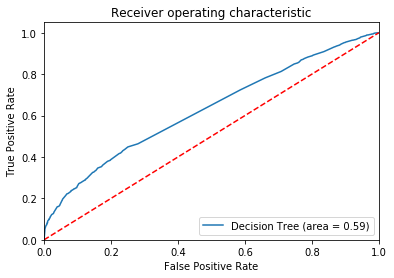

In [170]:
dtree_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Hyperparameter Optiization for Random Forest Classifier

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 10)]
max_depth.append(None)
max_features = ['auto', 'sqrt']

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
}

estimator = RandomForestClassifier(random_state = 69)
cv_test = KFold(n_splits=5)
gscv = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = cv_test, 
                        verbose = 2)

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1003 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:   36.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=69,
                                              verbose=0, warm_start=False),
 

In [172]:
gscv.best_params_

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 20}

In [173]:
best_model = gscv.best_estimator_

In [174]:
best_model.score(X_test,y_test)

0.6124760689215061

In [175]:
rf2_pred = best_model.predict(X_test)
rf2_prob = best_model.predict_proba(X_test)[:, 1]

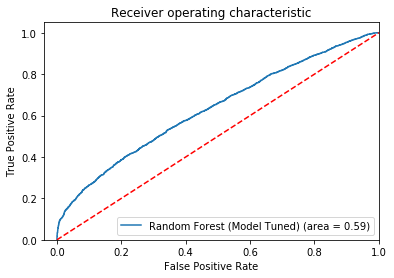

In [176]:
rf2_roc_auc = roc_auc_score(y_test, rf2_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf2_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Model Tuned) (area = %0.2f)' % rf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [177]:
y_pred_dt.size

6268

In [178]:
#prob = dtree.predict_proba(X_test)[:,1]

In [179]:
#prob.size

In [180]:
prob = pd.DataFrame(rf2_prob)

In [181]:
prob.tail()

,0
6263,0.514674
6264,0.512907
6265,0.347605
6266,0.455181
6267,0.500550


In [182]:
prob['is_goal'] = prob[0] 

In [183]:
prob.head()

,0,is_goal
0,0.563558,0.563558
1,0.356676,0.356676
2,0.413257,0.413257
3,0.416214,0.416214
4,0.368629,0.368629


In [184]:
prob = prob.drop([0], axis = 1)

In [185]:
prob['is_goal'].isnull().any()

False

In [186]:
df2.shape

(6268, 27)

In [187]:
prob.shape

(6268, 1)

In [188]:
submit =  df2[['shot_id_number']].copy()

In [189]:
submit.shape

(6268, 1)

In [190]:
submit = submit.reset_index()

In [191]:
submit.isnull().any()

index             False
shot_id_number    False
dtype: bool

In [192]:
submit['is_goal'] = prob[['is_goal']].copy()

In [193]:
submit.isnull().any()

index             False
shot_id_number    False
is_goal           False
dtype: bool

In [194]:
submit.to_csv(r'D:/DS/zs_submit.csv')

In [195]:
!jupyter nbconvert --to script zs.ipynb

[NbConvertApp] Converting notebook zs.ipynb to script
[NbConvertApp] Writing 11984 bytes to zs.py
